**Linear Regression and Ensemble Learning on the given dataset to predict the score of a student if he studies for about 9.25 hours in a day.**

**By: Rishita**

In [5]:
#importing all the required libraries
import numpy as np  #used for performing operations on numerical data
import pandas as pd  #used for data manipulation and analysis
import seaborn as sns #used for drawing statistical graphics 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score #for cross-validation evaluation
from sklearn.metrics import mean_squared_error #to calculate the RMSE
import xgboost as xgb
from xgboost import XGBRegressor 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Reading data of csv file from the given url
df = pd.read_csv("http://bit.ly/w-data")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
df.shape

(25, 2)

In [8]:
#checking if there are any null values
df.isnull().any()

Hours     False
Scores    False
dtype: bool

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

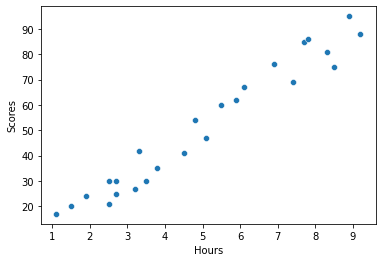

In [9]:
#Plotting the scores
sns.scatterplot(x='Hours',y='Scores',data=df)

In [10]:
#dividing the data into attributes (inputs) and labels (outputs)
X = df.iloc[:,:-1]
y = df.iloc[:,1]

In [11]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


# Linear Regression

In [12]:
#Splitting the data into training and test sets by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [13]:
#Splitting the independent and dependent features into train test split using sklearn library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [14]:
#training the algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [15]:
#prediction of the test data
y_pred = lr.predict(X_test)

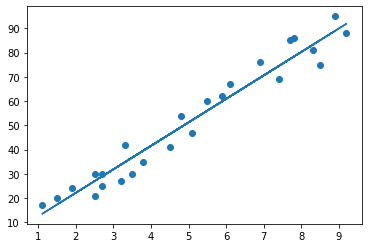

In [16]:
#Plotting the regression line
line = lr.coef_*X+lr.intercept_
#Plotting of the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [17]:
lr_score = cross_val_score(lr, X_train, y_train, verbose = 2)

#Average Coefficient of determination (R^2) on the validation set
print(f'R^2 Validation: {lr_score.mean()}')

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
R^2 Validation: 0.7953635134250876


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [18]:
#Fit the model to the training set
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

In [20]:
print(f'R^2 Test: {lr.score(X_test, y_test)}')

R^2 Test: 0.9678055545167994


In [21]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE Test: 4.352380006653288


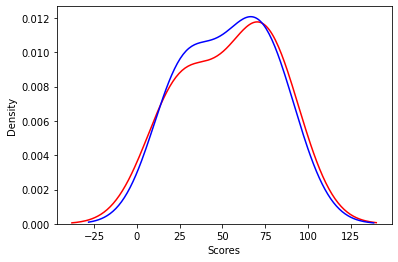

In [22]:
#Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)


In [70]:
print("If a student studies for 9.25hrs/day then he will score approximately {}".format(lr.predict([[9.25]])))

If a student studies for 9.25hrs/day then he will score approximately [92.38611528]


# Decision tree

In [23]:
#Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {'max_features': ['auto', 'sqrt'], #Number of features to consider at every split
               'max_depth': np.arange(5, 41, 5), #Maximum number of levels in tree
               'min_samples_split': [5, 10, 20, 40], #Minimum number of samples required to split a node
               'min_samples_leaf': [2, 6, 12, 24], #Minimum number of samples required at each leaf node
               }

In [24]:
from sklearn.tree import DecisionTreeRegressor

#Instantiate a RandomizedSearchCV on a DecisionTreeRegressor model with 100 iterations
tree_reg = RandomizedSearchCV(estimator = DecisionTreeRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)

tree_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 6, 12, 24],
                                        'min_samples_split': [5, 10, 20, 40]},
                   verbose=2)

In [25]:
#Check the best parameters found by RandomizedSearchCV
tree_reg.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [26]:
#Check the cross-validation evaluation metric of the best estimator
print(f'R^2 Validation: {tree_reg.best_score_}')

R^2 Validation: 0.29376647491588603


In [27]:
#Check the features which are considered as most important in making predictions
sorted(dict(zip(X_train.columns, tree_reg.best_estimator_.feature_importances_)).items(), key=lambda x: x[1], reverse=True)

[('Hours', 1.0)]

In [28]:
#Compute predictions from the test set
y_pred = tree_reg.predict(X_test)

In [29]:
#Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {tree_reg.score(X_test, y_test)}')

R^2 Test: 0.9427638039126822


In [30]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE Test: 5.803255791172554


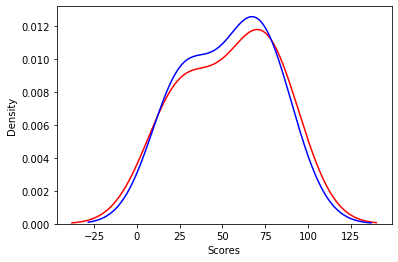

In [31]:
#Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)


In [71]:
print("If a student studies for 9.25hrs/day then he will score approximately {}".format(tree_reg.predict([[9.25]])))

If a student studies for 9.25hrs/day then he will score approximately [91.5]


# Random Forest

In [32]:
#Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {'max_features': ['auto', 'sqrt'], #Number of features to consider at every split
               'max_depth': np.arange(5, 41, 5), #Maximum number of levels in tree
               'min_samples_split': [5, 10, 20, 40], #Minimum number of samples required to split a node
               'min_samples_leaf': [2, 6, 12, 24], #Minimum number of samples required at each leaf node
               }

In [33]:
from sklearn.ensemble import RandomForestRegressor

#Instantiate a RandomizedSearchCV on a RandomForestRegressor model with 100 iterations
rfor_reg = RandomizedSearchCV(RandomForestRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)

rfor_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 6, 12, 24],
                                        'min_samples_split': [5, 10, 20, 40]},
                   verbose=2)

In [34]:
#Check the best parameters found by RandomizedSearchCV
rfor_reg.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [35]:
#Check the cross-validation evaluation metric of the best estimator
print(f'R^2 Validation: {rfor_reg.best_score_}')

R^2 Validation: 0.4900100215330186


In [36]:
#Check the features which are considered as most important in making predictions
sorted(dict(zip(X_train.columns, rfor_reg.best_estimator_.feature_importances_)).items(), key=lambda x: x[1], reverse=True)

[('Hours', 1.0)]

In [37]:
#Compute predictions from the test set
y_pred = rfor_reg.predict(X_test)

In [38]:
#Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {rfor_reg.score(X_test, y_test)}')

R^2 Test: 0.9756113576377059


In [39]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE Test: 3.788175968190208


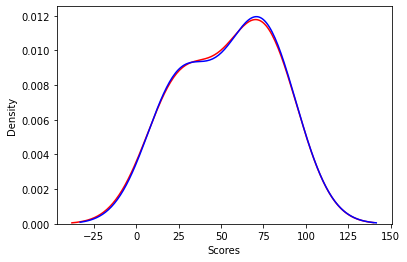

In [40]:
#Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

In [72]:
print("If a student studies for 9.25hrs/day then he will score approximately {}".format(rfor_reg.predict([[9.25]])))

If a student studies for 9.25hrs/day then he will score approximately [85.44070635]


# Adaptive Boosting

In [41]:
#Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {"learning_rate"   : [0.01, 0.1, 0.3],
              "loss"            : ['linear', 'square', 'exponential']
             }

In [42]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Instantiate a RandomizedSearchCV on an AdaBoostRegressor model with 100 iterations
ada_reg = RandomizedSearchCV(AdaBoostRegressor(DecisionTreeRegressor(min_samples_split = 40, min_samples_leaf = 2, max_depth = 40), n_estimators=100), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)

ada_reg.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=40,
                                                                                    min_samples_leaf=2,
                                                                                    min_samples_split=40),
                                               n_estimators=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'loss': ['linear', 'square',
                                                 'exponential']},
                   verbose=2)

In [43]:
#Check the best parameters found by RandomizedSearchCV
ada_reg.best_params_

{'loss': 'square', 'learning_rate': 0.3}

In [44]:
#Check the cross-validation evaluation metric of the best estimator
print(f'R^2 Validation: {ada_reg.best_score_}')

R^2 Validation: -0.9913201319986384


In [45]:
#Check the features which are considered as most important in making predictions
sorted(dict(zip(X_train.columns, ada_reg.best_estimator_.feature_importances_)).items(), key=lambda x: x[1], reverse=True)

[('Hours', 0.0)]

In [46]:
#Compute predictions from the test set
y_pred = ada_reg.predict(X_test)

In [47]:
#Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {ada_reg.score(X_test, y_test)}')

R^2 Test: -0.029979605710401147


In [48]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE Test: 24.617879681239813


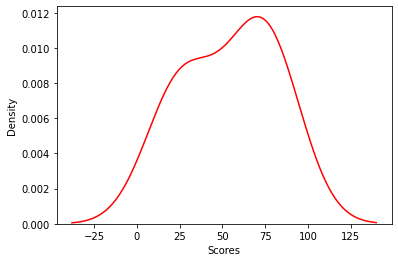

In [49]:
#Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)


In [73]:
print("If a student studies for 9.25hrs/day then he will score approximately {}".format(ada_reg.predict([[9.25]])))

If a student studies for 9.25hrs/day then he will score approximately [49.8]


# Gradient Boosting

In [50]:
#Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {"learning_rate"   : [0.01, 0.1, 0.3],
             "subsample"        : [0.5, 1.0],
             'max_depth'        : np.arange(5, 41, 5),
             "max_features"     : ['auto', 'sqrt'],
             "min_samples_split": [5, 10, 20, 40],
             "min_samples_leaf" : [2, 6, 12, 24]
             }

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

#Instantiate a RandomizedSearchCV on a GradientBoostingRegressor model with 100 iterations
grad_reg = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)

grad_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 6, 12, 24],
                                        'min_samples_split': [5, 10, 20, 40],
                                        'subsample': [0.5, 1.0]},
                   verbose=2)

In [52]:
#Check the best parameters found by RandomizedSearchCV
grad_reg.best_params_

{'subsample': 0.5,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25,
 'learning_rate': 0.3}

In [53]:
#Check the cross-validation evaluation metric of the best estimator
print(f'R^2 Validation: {grad_reg.best_score_}')

R^2 Validation: 0.5581935925113664


In [54]:
#Check the features which are considered as most important in making predictions
sorted(dict(zip(X_train.columns, grad_reg.best_estimator_.feature_importances_)).items(), key=lambda x: x[1], reverse=True)

[('Hours', 1.0)]

In [55]:
#Compute predictions from the test set
y_pred = grad_reg.predict(X_test)

In [56]:
#Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {grad_reg.score(X_test, y_test)}')

R^2 Test: 0.9417785211889775


In [57]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE Test: 5.852992237514552


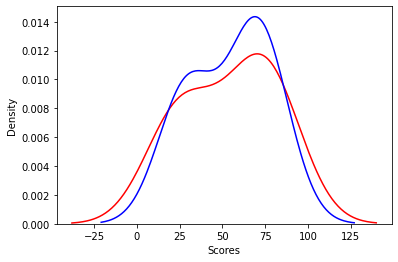

In [58]:
#Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)


In [74]:
print("If a student studies for 9.25hrs/day then he will score approximately {}".format(grad_reg.predict([[9.25]])))

If a student studies for 9.25hrs/day then he will score approximately [90.81364703]


# XG Boosting 

In [59]:
#from xgboost import XGBRegressor
#Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {"learning_rate"   : [0.01, 0.1, 0.3] ,#step size shrinkage used to prevent overfitting
             'max_depth'        : np.arange(5, 41, 5),
             "min_child_weight" : [1, 3, 5, 7],
             "gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4],
             "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
             }

In [60]:
#Instantiate a RandomizedSearchCV on an XGBRegressor model with 100 iterations
from xgboost import XGBRegressor
xgbr = RandomizedSearchCV(XGBRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)

xgbr.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample

In [61]:
#Best parameters
xgbr.best_params_

{'min_child_weight': 3,
 'max_depth': 35,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [62]:
#Check the cross-validation evaluation metric of the best estimator
print(f'R^2 Validation: {xgbr.best_score_}')

R^2 Validation: 0.5078704762631924


In [63]:
#Check the number of times a feature was used to split the data across all trees
sorted(xgbr.best_estimator_.get_booster().get_score(importance_type='weight').items(), key=lambda x: x[1], reverse=True)

[('Hours', 255)]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

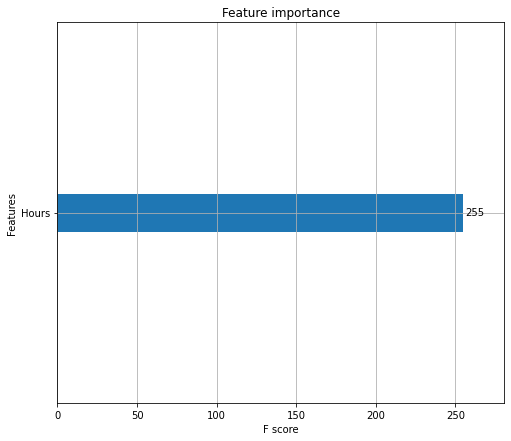

In [64]:
#Plot the same data on a graph
from xgboost import plot_importance
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8, 7))
plot_importance(xgbr.best_estimator_, ax=ax)

In [65]:
#Compute predictions from the test set
y_pred = xgbr.predict(X_test)

In [66]:
#Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {xgbr.score(X_test, y_test)}')

R^2 Test: 0.9516541097653008


In [67]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE Test: 5.333546832464956


In [76]:
print("If a student studies for 9.25hrs/day then he will score approximately {}".format(lr.predict([[9.25]])))

If a student studies for 9.25hrs/day then he will score approximately [92.38611528]


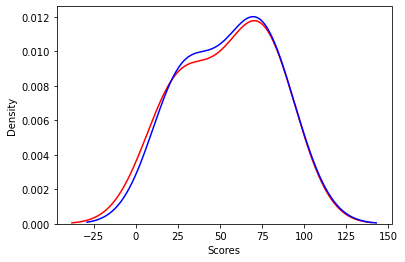

In [68]:
#Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Result

**We have used Linear Regression, Decision tree, Random Forest, Adaptive boosting, Gradient boosting and XG boosting to predict the score of a student if he studies 9.25 hours in a day**

**Out of all the models used for prediction, Random forest is the most accurate for this problem (R^2 test value is maximum).**